In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [50]:
df = pd.read_pickle('./data/preprocessed_data.pkl')
df.head()

ZnO                \
                                                         1             2   
scent_name trial_num on_off_state Time (sec)                               
Heptanol   0         on           0.000009    7.740000e-10  3.028200e-07   
                                  2.981646    1.150800e-08  2.955960e-07   
                                  5.951279    1.164000e-08  2.985380e-07   
                                  8.889494    1.139700e-08  3.051830e-07   
                                  11.895487   8.972000e-09  2.375300e-07   

                                                                SnO2  \
                                                         3         1   
scent_name trial_num on_off_state Time (sec)                           
Heptanol   0         on           0.000009    1.332600e-08  0.000072   
                                  2.981646    1.503100e-08  0.000072   
                                  5.951279    1.300000e-08  0.000073   
                                  8.889494    1.305800e-08  0.000073   
                                  11.895487   7.302000e-09  0.000073   

                                                                  \
                                                     2         3   
scent_name trial_num on_off_state Time (sec)                       
Heptanol   0         on           0.000009    0.000065  0.000053   
                                  2.981646    0.000064  0.000054   
                                  5.951279    0.000065  0.000054   
                                  8.889494    0.000065  0.000054   
                                  11.895487   0.000066  0.000055   

                                                       AZO            \
                                                         1         2   
scent_name trial_num on_off_state Time (sec)                           
Heptanol   0         on           0.000009    1.267340e-07  0.000001   
                                  2.981646    1.277770e-07  0.000001   
                                  5.951279    1.306230e-07  0.000001   
                                  8.889494    1.175820e-07  0.000001   
                                  11.895487   1.184220e-07  0.000001   

                                                            
                                                         3  
scent_name trial_num on_off_state Time (sec)                
Heptanol   0         on           0.000009    4.576990e-07  
                                  2.981646    5.968640e-07  
                                  5.951279    5.696490e-07  
                                  8.889494    5.729060e-07  
                                  11.895487   5.641550e-07

In [51]:
data = df.droplevel("on_off_state")
scents = df.index.map(lambda x: x[0]).unique()
print(scents)

trials = []
for i in scents:
    trials.append(df.loc[i].index.max()[0])
print(trials)

Index(['Heptanol', '2-ethylfenchol', 'Octanal', 'Eugenol', 'Cis-3-hexenol',
       'Decanal', '2,3,5 trymethylpyrazine', 'Geraniol'],
      dtype='object')
[11, 11, 11, 6, 6, 6, 8, 6]


In [52]:
data.head()

ZnO                              \
                                            1             2             3   
scent_name trial_num Time (sec)                                             
Heptanol   0         0.000009    7.740000e-10  3.028200e-07  1.332600e-08   
                     2.981646    1.150800e-08  2.955960e-07  1.503100e-08   
                     5.951279    1.164000e-08  2.985380e-07  1.300000e-08   
                     8.889494    1.139700e-08  3.051830e-07  1.305800e-08   
                     11.895487   8.972000e-09  2.375300e-07  7.302000e-09   

                                     SnO2                               AZO  \
                                        1         2         3             1   
scent_name trial_num Time (sec)                                               
Heptanol   0         0.000009    0.000072  0.000065  0.000053  1.267340e-07   
                     2.981646    0.000072  0.000064  0.000054  1.277770e-07   
                     5.951279    0.000073  0.000065  0.000054  1.306230e-07   
                     8.889494    0.000073  0.000065  0.000054  1.175820e-07   
                     11.895487   0.000073  0.000066  0.000055  1.184220e-07   

                                                         
                                        2             3  
scent_name trial_num Time (sec)                          
Heptanol   0         0.000009    0.000001  4.576990e-07  
                     2.981646    0.000001  5.968640e-07  
                     5.951279    0.000001  5.696490e-07  
                     8.889494    0.000001  5.729060e-07  
                     11.895487   0.000001  5.641550e-07

In [54]:
data.loc[("Heptanol", 1), ("ZnO", 1)]

Time (sec)
602.290883     1.184100e-08
605.298575     1.066900e-08
608.322897     1.154800e-08
611.334691     1.160100e-08
614.342759     1.175700e-08
                   ...     
2385.566313    1.105800e-08
2388.578338    1.060500e-08
2391.519402    1.486000e-08
2394.500439    1.151400e-08
2397.528515    1.165700e-08
Name: (ZnO, 1), Length: 597, dtype: float64

In [55]:
df.shape

(36670, 9)

In [45]:
n = 0
for i in range(8):
    print(scents[i])
    for j in range(1, trials[i]):
        print(df.loc[scents[i], j].to_numpy().shape)
        n += 1
print(n)

Heptanol
(597, 9)
(596, 9)
(595, 9)
(594, 9)
(594, 9)
(594, 9)
(593, 9)
(593, 9)
(593, 9)
(592, 9)
2-ethylfenchol
(599, 9)
(598, 9)
(597, 9)
(597, 9)
(596, 9)
(596, 9)
(594, 9)
(592, 9)
(589, 9)
(590, 9)
Octanal
(597, 9)
(598, 9)
(596, 9)
(593, 9)
(592, 9)
(594, 9)
(596, 9)
(593, 9)
(592, 9)
(591, 9)
Eugenol
(598, 9)
(598, 9)
(598, 9)
(597, 9)
(597, 9)
Cis-3-hexenol
(597, 9)
(598, 9)
(596, 9)
(592, 9)
(589, 9)
Decanal
(598, 9)
(598, 9)
(597, 9)
(598, 9)
(597, 9)
2,3,5 trymethylpyrazine
(592, 9)
(584, 9)
(589, 9)
(584, 9)
(576, 9)
(584, 9)
(576, 9)
Geraniol
(601, 9)
(599, 9)
(597, 9)
(598, 9)
(597, 9)
57


C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


In [60]:
min_max_scaler = preprocessing.MinMaxScaler()
# except the trial num 0(First trial) since this one was the testing trial in the experiment.
data = np.zeros(((sum(trials)-8)*3, 570, 3)) 
label = []

count = 0
for i in range(8):
    print(scents[i])
    for j in range(1, trials[i]):
        for k in range(3):            
            label.append(i)
            temp = df.loc[scents[i], j]
            temp = temp.to_numpy()[:570]
            temp = temp[:, (0+k, 3+k, 6+k)]
#             print(temp.shape)
            temp = min_max_scaler.fit_transform(temp)
            data[count] = temp
            count += 1
print(count)


Heptanol
2-ethylfenchol
Octanal
Eugenol
Cis-3-hexenol
Decanal
2,3,5 trymethylpyrazine


C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\a

Geraniol
171


C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\ansck\anaconda3\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Users\a

In [61]:
print(data)
print(data.shape)

[[[0.96689359 0.20304148 0.18641554]
  [0.88290935 0.21551953 0.16422428]
  [0.94589753 0.19566206 0.12240403]
  ...
  [0.83726263 0.59012623 0.30387485]
  [0.82314583 0.61884785 0.28498007]
  [0.88663561 0.60614236 0.28512991]]

 [[0.34517988 0.80706239 0.23487079]
  [0.2968386  0.7897367  0.21582259]
  [0.37691523 0.79460788 0.21694667]
  ...
  [0.58516926 0.71502034 0.0234712 ]
  [0.54536518 0.70949127 0.04914167]
  [0.51863463 0.70450731 0.05807319]]

 [[0.56677868 0.34020315 0.13460634]
  [0.47156882 0.35843139 0.12563095]
  [0.461949   0.36390431 0.12867321]
  ...
  [0.67424392 0.35152087 0.08580656]
  [0.67589115 0.33949267 0.10612569]
  [0.64479146 0.3406361  0.09774932]]

 ...

 [[0.62197414 0.60950567 0.93840074]
  [0.60174644 0.64482092 0.93834097]
  [0.61379463 0.65294046 0.95033956]
  ...
  [0.81087653 0.92666748 0.58000433]
  [0.81242401 0.90413272 0.58129683]
  [0.79650713 0.94979667 0.57261541]]

 [[0.49045748 0.78600795 0.90898736]
  [0.51087567 0.78980232 0.87378641]


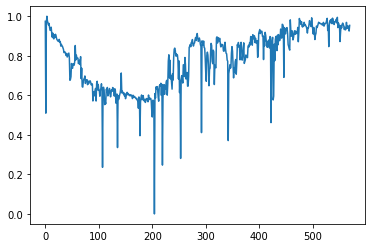

In [113]:
plt.plot(data[3,:,0])
plt.show()

In [69]:
X = data.reshape(57*3, -1)
# print(X)
print(X.shape)
y = np.array(label)
y = tf.keras.utils.to_categorical(y)
# print(y)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# FFT 시도
# from scipy.fft import fft
# x_fft = fft(X)
# x_fft.shape
# fig, axes = plt.subplots(57, 1, constrained_layout= True)
# fig.set_size_inches((20,400))
# for i in range(57):
#     axes[i].plot(x_fft[i])

(171, 1710)


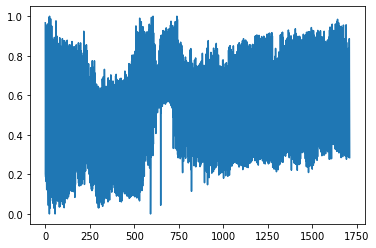

In [104]:
plt.plot(X[0,:])

In [118]:
nb_classes = 8
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(nb_classes, activation = 'softmax'),
 ])

# model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9),
#               loss='mse',
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=60,
                    validation_data=(X_test, y_test),
                    )

Epoch 1/60
5/5 [==============================] - 1s 41ms/step - loss: 2.2506 - accuracy: 0.1397 - val_loss: 1.8936 - val_accuracy: 0.2000
Epoch 2/60
5/5 [==============================] - 0s 10ms/step - loss: 2.0406 - accuracy: 0.1985 - val_loss: 1.9505 - val_accuracy: 0.2571
Epoch 3/60
5/5 [==============================] - 0s 12ms/step - loss: 2.0737 - accuracy: 0.2206 - val_loss: 1.7660 - val_accuracy: 0.4286
Epoch 4/60
5/5 [==============================] - 0s 12ms/step - loss: 1.9520 - accuracy: 0.2353 - val_loss: 1.6233 - val_accuracy: 0.5429
Epoch 5/60
5/5 [==============================] - 0s 12ms/step - loss: 1.7639 - accuracy: 0.3603 - val_loss: 1.5216 - val_accuracy: 0.5714
Epoch 6/60
5/5 [==============================] - 0s 10ms/step - loss: 1.7517 - accuracy: 0.3676 - val_loss: 1.4447 - val_accuracy: 0.4571
Epoch 7/60
5/5 [==============================] - 0s 10ms/step - loss: 1.7099 - accuracy: 0.3235 - val_loss: 1.3068 - val_accuracy: 0.6571
Epoch 8/60
5/5 [===========

5/5 [==============================] - 0s 15ms/step - loss: 0.5493 - accuracy: 0.7721 - val_loss: 0.4207 - val_accuracy: 0.8000
Epoch 60/60
5/5 [==============================] - 0s 17ms/step - loss: 0.4565 - accuracy: 0.8235 - val_loss: 0.4274 - val_accuracy: 0.8571


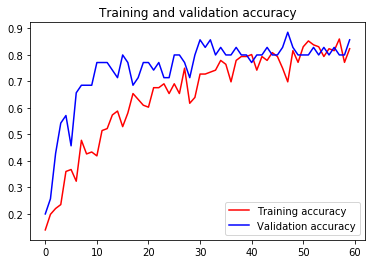

<Figure size 432x288 with 0 Axes>

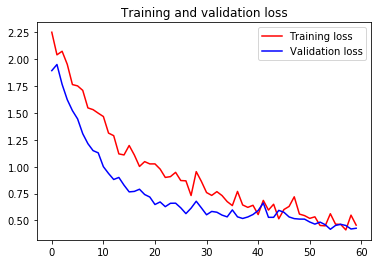

<Figure size 432x288 with 0 Axes>

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [11]:
y_train

array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 

In [12]:
y_test.shape

(12, 8)

In [13]:
y

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 